In [43]:
%matplotlib notebook

import pandas as pd
import numpy as np
from langdetect import detect
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import nltk
    
import textstat

In [36]:
# one time download
nltk.download([
         "stopwords",
        "vader_lexicon",
        "punkt",
 ])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Exploratory data analysis

In [44]:
df = pd.read_csv('train.csv')

In [45]:
df.columns

Index(['Labels', 'text', 'Text_Tag'], dtype='object')

### Basic text stats (Word count, unique word count, % of unique word count, # of sentence)

- Best practices word count vary based on context and kind of text data. 
- Percent of unique word count above 60% should be good in large text

In [46]:
df['word_count'] = df['text'].apply(lambda x: len(nltk.tokenize.word_tokenize(x)))
df['uniqueword_count'] = df['text'].apply(lambda x: len(set(nltk.tokenize.word_tokenize(x))))
df['percent_uniqueword'] = df['uniqueword_count']*100/df['word_count']

df['sent_count'] = df['text'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))
df['avg_wordcnt_per_sent'] = df['word_count']/df['sent_count']

In [47]:
### Text with less than 10 words
df[df['word_count'] <= 10]['text']

19       Almost 100,000 people left Puerto Rico last year.
25                   I dont know who (Jonathan Gruber) is.
30                Says Paul Ryan is still endorsing Trump.
91                                I belong to the AFL-CIO.
92       The insurance commissioner cant do squat about...
                               ...                        
10149     Were the only system of federalism in the world.
10152    Texans pay the sixth-highest property tax in t...
10194          Wisconsins dead last in Midwest job growth.
10196     Rail doesnt do a great job in lessening traffic.
10204    Says Texas leads the nation in fatal industria...
Name: text, Length: 995, dtype: object

- Based on above matrix various analysis can be perfomed such as text with Below throshold of % unique word count, Distribution of text with respect to various catogical variable

Plotting of distribution of work with respect to categorical variable such as department, owner, employee etc provide good view of style of writing

- Various plots such as histogram, boxplot can be drawn to perform that analysis

### some plotting example

<IPython.core.display.Javascript object>


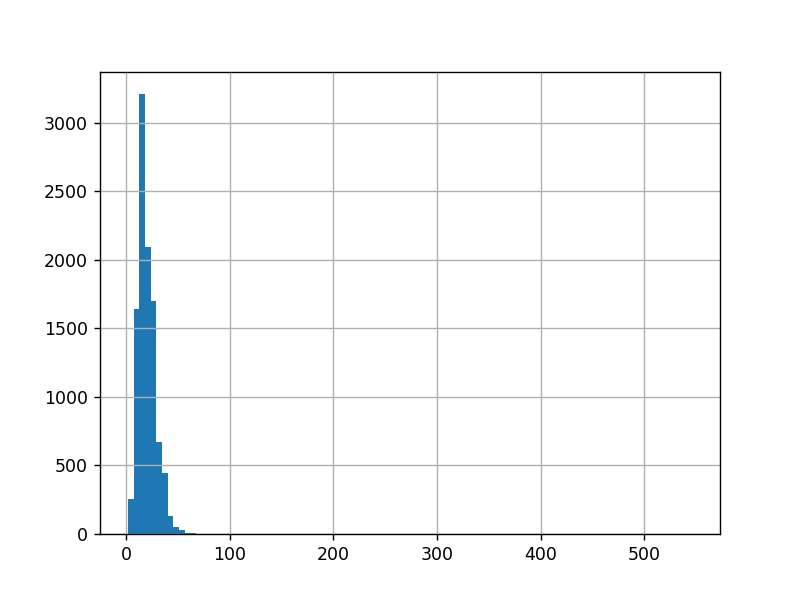

In [48]:
df['word_count'].hist(bins=100)

<IPython.core.display.Javascript object>


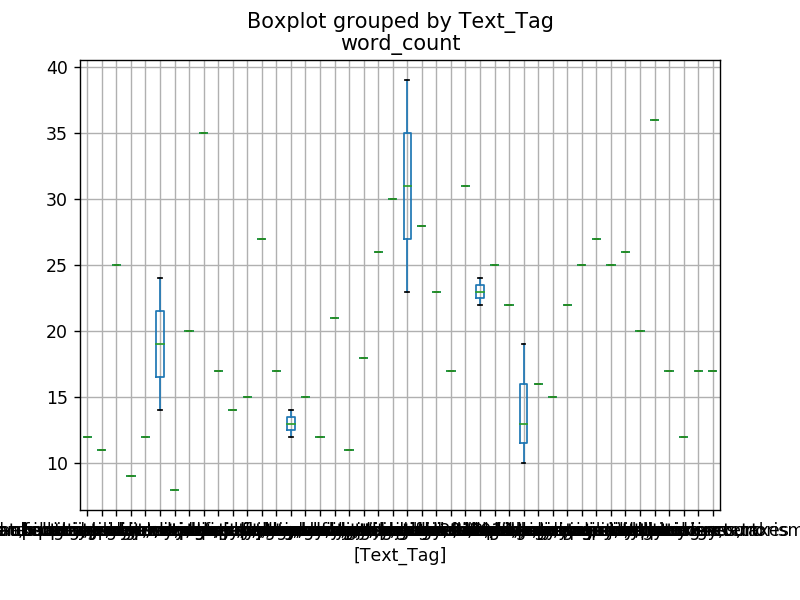

In [51]:
# plotting for only 50 rows due to size
df[0:50].boxplot(column=['word_count'], by=['Text_Tag'])

In [6]:
## text having less than equal to 1 sentences
np.sum(df['sent_count'] <= 1)

8986

In [7]:
df[df['sent_count'] <=1]['text']

0        Says the Annies List political group supports ...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
5        The Chicago Bears have had more starting quart...
                               ...                        
10234    Under the ruling of the Supreme Court, any lob...
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
Name: text, Length: 8986, dtype: object

##  Language Detection

- if any other languages present in text

In [8]:
def langauge_detect(text):
    val = ''
    try: 
        val = detect(text)
    except:
        pass
    return val

df['lang_detect'] = df['text'].apply(lambda x: langauge_detect(x))


In [9]:
# Count of text with various languauge on it
df['lang_detect'].value_counts()

en    10169
fr       15
ca        8
da        8
it        7
af        5
es        5
id        5
de        5
et        3
tl        3
nl        3
pt        1
no        1
lt        1
so        1
Name: lang_detect, dtype: int64

In [10]:
# non english text
df[df['lang_detect'] != 'en'][['text', 'lang_detect']]

,text,lang_detect
151,Rob Cornilles supports privatizing Medicare.,it
256,Warren (Buffett) still does support me.,no
270,On legalizing illegal immigrants.,it
298,Immigrants are more fertile.,fr
392,On offshore drilling for energy,da
...,...,...
8957,Obama voted to raise taxes on people making ju...,et
9353,Obamas job approval rating is up.,lt
9431,Soy ... el nico official estatal quin es un ho...,es
9865,Says Ovide Lamontagne wants to eliminate kinde...,nl


## Readability Score (Flesh Score)
 - Check google for range of score with respect to reading difficulty

In [11]:
df['flesch_score'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))

In [12]:
## difficult to read text
df[df['flesch_score'] < 50][['text', 'flesch_score']]

,text,flesch_score
8,"However, it took $19.5 million in Oregon Lotte...",39.67
15,"In this last election in November, ... 63 perc...",48.47
16,McCain opposed a requirement that the governme...,27.99
29,Youth unemployment in minority communities is ...,34.93
42,Rep. David Cicilline is responsible for the fe...,38.32
...,...,...
10226,The proudest accomplishment (of my tenure) was...,48.47
10227,"Recently though, the media has reported on tho...",47.79
10230,The Supreme Courts views are radically out of ...,34.26
10237,Says an alternative to Social Security that op...,26.14


## Phrases exractions
 - simple code in pandas to check the phrases. For more advance phrases we can use regular expression
 - below code searches for word 'critial' in text

    


In [14]:
df['phrase_critial'] = df['text'].str.lower().str.contains('critical')


In [16]:
# text which contains critical
df.loc[df['phrase_critial'], 'text']

556     Marco Rubio voted against funding health clini...
599     For the first time ever, we completely funded ...
906     Obama "voted against critical resources: no to...
4801    So many people were critical of Secretary (Joh...
7296    Obama spokesman Bill Burton says Clinton gave ...
8777    Says Jim Renacci ran against the Washington es...
9576    (Stimulus money) went to critically important ...
Name: text, dtype: object

## Sentiment Analysis

In [ ]:
- requires vader library

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment_analysis(sentences):
    polarity = 0
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        polarity = polarity + ss['compound']
    return polarity/len(sentences)

In [22]:
sid = SentimentIntensityAnalyzer()
df['sent_polarity'] = df['text'].apply(lambda x: sentiment_analysis(sent_tokenize(x)))

In [23]:
# Average text polarity
df[['text', 'sent_polarity']].head()

,text,sent_polarity
0,Says the Annies List political group supports ...,0.2500
1,When did the decline of coal start? It started...,0.1806
2,"Hillary Clinton agrees with John McCain ""by vo...",0.3182
3,Health care reform legislation is likely to ma...,0.7579
4,The economic turnaround started at the end of ...,0.0000


## Additional Things that can be looked at

- Entity recoginition
- phrases extrdaction
- toxic information extraction
- duplicate text
- Word frequence/word cloud
- Relevance of text (with respect to common words)